# Implementing MCMC algorithms
Fadel Sougou and Hugo Borsoni

## Definition of the target distributions
- A normal law
- A more complex density function

In [75]:
from math import exp, sqrt, pi

def normal_dist(x, mu, sig):
    return exp(-0.5*((x-mu)/sig)**2)/(sig*sqrt(2*pi))


mu = 2.34321
sig = 1.233
def target_dist_0(x):
    return normal_dist(x, mu, sig)


print(target_dist_0(mu))
print(target_dist_0(0))

0.32355416090951555
0.05317458453940047


In [76]:
def target_dist_1(x):
    return (normal_dist(x,1,1)+normal_dist(x,8,0.5)+normal_dist(x,12,3))/3

print(target_dist_1(1))
print(target_dist_1(0))

0.13303412353954655
0.08067177819813277


### Definition of a Markov transition
For clarity of the code

In [77]:
import random
def MarkovTransition(src: float) -> float:
    r = random.random()
    dest = src + 2*(r-0.5)  # uniform distribution on the interval [src-1, src+1]
    return dest

print(MarkovTransition(0))

-0.07467784424961765


## Metropolis-Hastings algorithm

In [78]:
def metropolis_mcmc(n,target_dist):
    Xs = (random.random()-0.5)*10
    samples = [Xs]
    for i in range(n):
        xi = samples[-1]
        x = MarkovTransition(xi)
        alpha = target_dist(x)/target_dist(xi)
        u = random.random()
        if u < alpha:
            samples.append(x)
        else:
            samples.append(xi)
    return samples


## Distribution estimation with MCMC and the Metropolis-Hastings algo

In [79]:
n=10**6

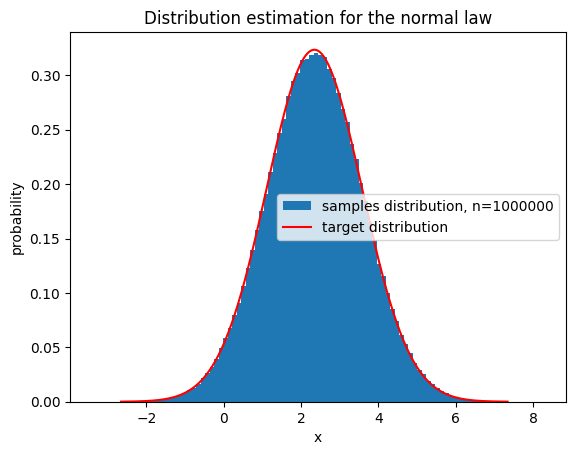

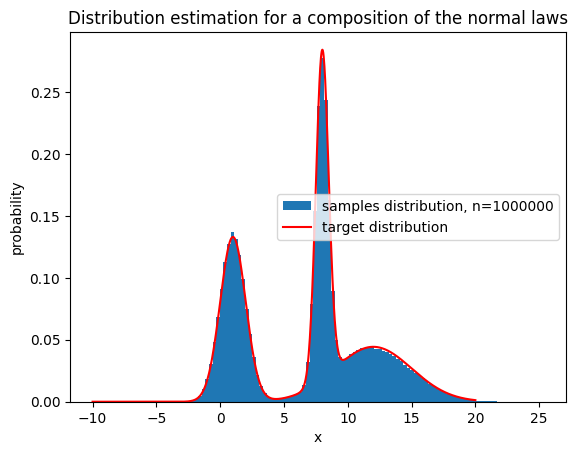

In [80]:
from matplotlib import pyplot as plt 
import numpy as np

def distribution_estimation(n,target_dist,bounds,title):
    samples = metropolis_mcmc(n,target_dist)
    Y = [0 for _ in range(len(samples))]
    plt.hist(samples, density=True, bins=100, label = "samples distribution, n="+str(n))

    targetX = np.linspace(bounds[0], bounds[1], 1000)
    targetY = [target_dist(x) for x in targetX]
    plt.plot(targetX, targetY, color="red", label="target distribution")
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("probability")
    plt.legend()
    plt.show()
    return samples

samples1=distribution_estimation(n,target_dist_0,(mu-5, mu+5),'Distribution estimation for the normal law')
samples2=distribution_estimation(n,target_dist_1,(-10,20),'Distribution estimation for a composition of the normal laws')

### Plotting the progression of the Markov Chain in the density

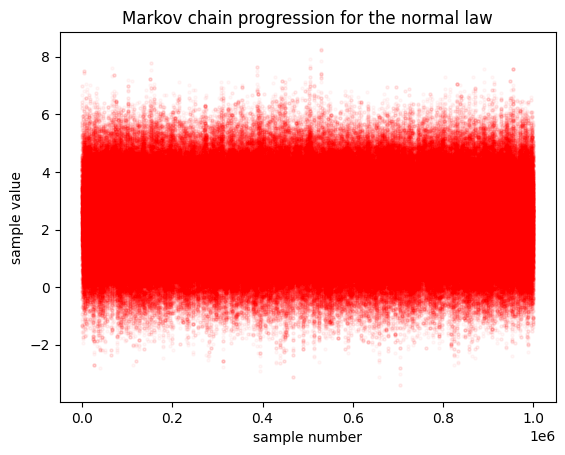

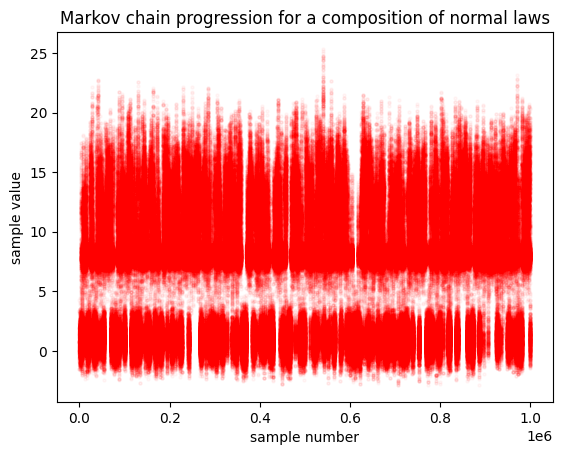

In [81]:
import matplotlib.pyplot as plt

def show_mcmc_prog(samples,title):
    plt.scatter(range(len(samples)), samples, color="red",alpha=0.03,s=5)
    plt.title(title)
    plt.xlabel("sample number")
    plt.ylabel("sample value")
    plt.show()

show_mcmc_prog(samples1,"Markov chain progression for the normal law")
show_mcmc_prog(samples2,"Markov chain progression for a composition of normal laws")